In [8]:
#starting imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm


In [2]:
#left eye represented by 0 and right eye 1
#this shell converting the images into array and with some scripting I stored the label from its name
training_data = []
path = "‪E:\\datasets\\left right images".rsplit("\u202a")[1]
IMG_SIZE = 28
for img in tqdm(os.listdir(path)):  
    if 'left' in img:
        class_num = 0
    else:
        class_num = 1
    try:
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) 
        training_data.append([new_array, class_num]) 
    except Exception as e:
        print("problem")
        break

100%|███████████████████████████████████████████████████████████████████████████| 12052/12052 [01:07<00:00, 178.85it/s]


In [13]:
#separating image's array and labels of them
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

#reshaping as every pixel can a single array 
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1) 

#converting all into 0 to 1, as 255 is the max value in color cmbination
X = X/255.0

In [14]:
#all keras imports
import tensorflow as tf
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential,load_model,model_from_json
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping

In [36]:
#early stop
es = EarlyStopping(monitor='val_acc')

In [44]:
#the model
model2 = Sequential()

model2.add(Conv2D(256,kernel_size=3,activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,1)))
model2.add(MaxPooling2D(2))

model2.add(Conv2D(128,kernel_size=3,activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,1)))
model2.add(MaxPooling2D(2))
model2.add(Conv2D(64,kernel_size=3,activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,1)))
model2.add(Conv2D(64,kernel_size=3,activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,1)))

model2.add(Flatten())
model2.add(Dense(2,activation='softmax'))

In [45]:
model2.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [46]:
#because of early stoping itteration stoped 
training = model2.fit(X, y, epochs=100, validation_split=0.2,callbacks=[es])

Train on 9641 samples, validate on 2411 samples
Epoch 1/100
9641/9641 [==============================] - 87s 9ms/step - loss: 0.3550 - acc: 0.8215 - val_loss: 0.1685 - val_acc: 0.9415
Epoch 2/100
9641/9641 [==============================] - 84s 9ms/step - loss: 0.1457 - acc: 0.9452 - val_loss: 0.1321 - val_acc: 0.9552
Epoch 3/100
9641/9641 [==============================] - 83s 9ms/step - loss: 0.1193 - acc: 0.9566 - val_loss: 0.1282 - val_acc: 0.9552


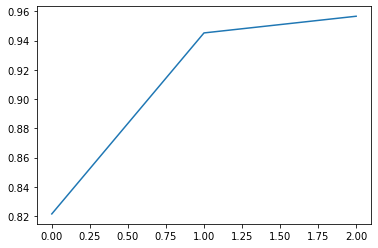

In [47]:
#below two graph is showing us there is no overfitting and I handle it with early stoping 
plt.plot(training.history['acc'])

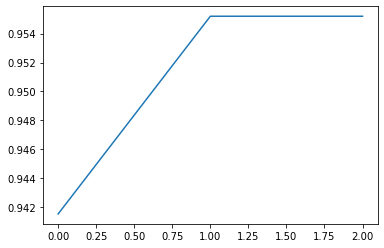

In [48]:
plt.plot(training.history['val_acc'])

In [49]:
#As keras dont suffle before splitting, so last 20% must be the test dataset. I will use this for creating a confusion matrix
test_data = training_data[9642:12052]

In [59]:
#making the data feedable
X_test = []
y_test = []

for features,label in test_data:
    X_test.append(features)
    y_test.append(label)

X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1) 

X_test = X_test/255.0

In [60]:
#predicting with the test data 
y_predict = model2.predict_classes(X_test)

In [61]:
#creating the confusion matrix
from sklearn.metrics import confusion_matrix

con_matrix = confusion_matrix(y_test, y_predict)
con_matrix

array([[1156,   49],
       [  59, 1146]], dtype=int64)

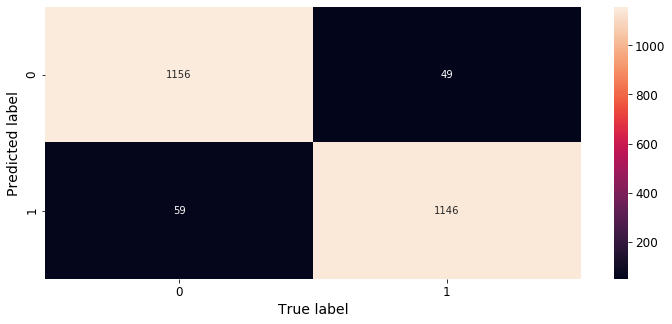

In [62]:
#some better visualization
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
f, ax = plt.subplots(figsize=(12,5))
sn.heatmap(con_matrix , annot=True,fmt="d")
ax.set_xlabel('True label', size=14)
ax.set_ylabel('Predicted label',size=14)

plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12)
plt.show()

In [66]:
#the summery and structure of my model
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 26, 26, 256)       2560      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 11, 11, 128)       295040    
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 3, 3, 64)          73792     
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 1, 1, 64)          36928     
_________________________________________________________________
flatten_8 (Flatten)          (None, 64)                0         
__________